In [1]:
%load_ext autoreload
%autoreload 2
import torch
from Dreamers.models.transformers.blocks import Attention

In [2]:
n_dim = 128
n_heads = 8
attention = Attention(n_dim, n_heads, qk_norm=True)
x = torch.rand(32, 16, n_dim)
Y = attention(x, x, x)
Y.shape

torch.Size([32, 16, 128])

In [3]:
attention.state_dict()['W_k.weight']

tensor([[ 0.0249,  0.0366, -0.0868,  ...,  0.0792,  0.0448, -0.0853],
        [ 0.0510,  0.0513, -0.0485,  ...,  0.0464,  0.0621, -0.0281],
        [ 0.0540, -0.0060, -0.0370,  ..., -0.0435, -0.0681,  0.0779],
        ...,
        [ 0.0648, -0.0523,  0.0782,  ...,  0.0633,  0.0312, -0.0283],
        [ 0.0467,  0.0178,  0.0273,  ...,  0.0400, -0.0795, -0.0339],
        [-0.0047,  0.0435, -0.0023,  ..., -0.0591,  0.0187,  0.0433]])

In [113]:
from Dreamers.models.transformers.blocks import RopeEmbedding
T = 2047
D = 4
rope = RopeEmbedding(D, 2048)

In [114]:
import torch

q = torch.zeros(2, 4, T, D)
k = torch.zeros(2, 4, T, D)

q[:, :, :, -4:] = torch.tensor([[1., 0., 0., 1.]])
k[:, :, :, -4:] = torch.tensor([[1., 0., 0., 1.]])
rq, rk = rope(q, k)

(-1.0, 1.0)

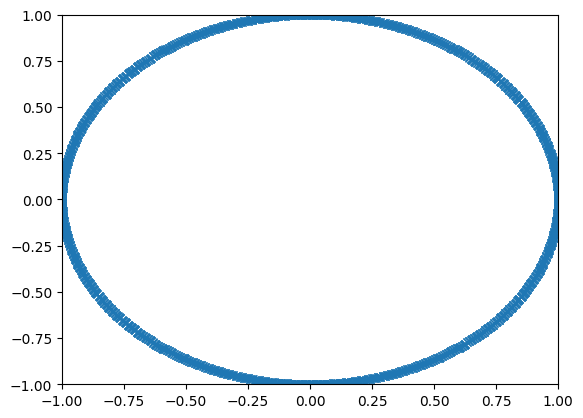

In [103]:
q_odd, q_even = q[..., ::2], q[..., 1::2]
qJ = torch.stack([-q_even, q_odd], dim=-1).reshape_as(q)

q_rot = (q * rope.cos_emb[...,:T,:]) + (qJ * rope.sin_emb[...,:T,:])
plt.plot(q_rot[0,0,:,-4], q_rot[0,0,:,-3], 'x')
# plt.plot(q_rot[0,0,:512,-2], q_rot[0,0,:512,-1])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [ ]:
from Dreamers.models.transformers.blocks import RopeEmbedding
from Dreamers.models.transformers.blocks import MultiHeadAttention

n_dim = 128
n_heads = 8
rope = RopeEmbedding(n_dim//n_heads, 2048)
attention = MultiHeadAttention(n_dim, n_heads, rope=rope)
x = torch.rand(32, 16, n_dim)
Y, A = attention(x, x, x)

In [6]:
dim = 2
ndim = 5 # B, D1, D2, D3, D
range(1, dim), dim, range(dim+1, ndim)

(range(1, 2), 2, range(3, 5))

In [7]:
import torch
q = torch.randn(4, 32, 64, 128, 100, dtype=torch.float32)
k = 2

In [12]:

dims = list(q.shape)
B = dims[0]
D = dims[-1]
T_k = dims[k]
flattened_q = q.transpose(k, -2).contiguous().view(-1, T_k, D)

In [24]:
reconstructed_q = flattened_q.view((dims[:k]+dims[k+1:-1]+[dims[k], D])).transpose(k, -2).contiguous()

In [27]:
dims_q = list(q.shape)
D = dims_q[-1]
Tq_k = dims_q[dim]
reordered_q = q.transpose(dim, -2).contiguous().view(-1, Tq_k, D)
q - reordered_q.view((dims_q[:dim]+dims_q[dim+1:-1]+[dims_q[dim], D])).transpose(dim, -2).contiguous()

NameError: name 'dim' is not defined